In all of these problems we will have two functions. The first is the function that we are actually trying to optimize and the second will be the constraint. Sketching the situation will often help us to arrive at these equations so let’s do that.

This is a sketch of a rectangle.  The top is labeled “Building” the bottom is labeled “x” and the right side is labeled “y”.
In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are,
    $$
    Maximize : A=xy
    $$
    $$
    Constraint : 500=x+2y
    $$
Okay, we know how to find the largest or smallest value of a function provided it’s only got a single variable. The area function (as well as the constraint) has two variables in it and so what we know about finding absolute extrema won’t work. However, if we solve the constraint for one of the two variables we can substitute this into the area and we will then have a function of a single variable.

So, let’s solve the constraint for x. Note that we could have just as easily solved for y but that would have led to fractions and so, in this case, solving for x will probably be best.
    $$
    x=500−2y
    $$
Substituting this into the area function gives a function of y.
    $$
    A(y)=(500−2y)y=500y−2y^2
    $$

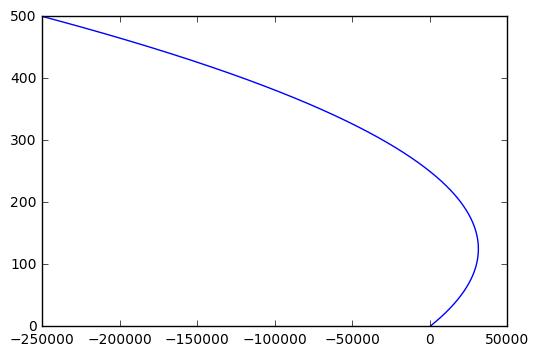

In [13]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
y=np.arange(0,500,0.0001)
x=(500-2*y)*y

plt.plot(x,y)
plt.show()

In [5]:
y = tf.Variable(tf.random_uniform([1], -500, 500.0))
print(y)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>


In [6]:
# 1.4 Build training graph.
loss = tf.reduce_mean((500-2*y)*y)  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.01)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([y]))

[array([-219.4748], dtype=float32)]


In [8]:
# 1.7 Perform training.
for step in range(1000):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0:
    #    print(step, sess.run([W, b]))

print(sess.run([y]))

[array([124.99991], dtype=float32)]


In [25]:
x = 125
y = 500-2*x
y

250

In [26]:
x*y

31250

In [11]:
from math import sin, cos

from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation

# Analysis plugin base class.
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore

# Define population.
indv_template = BinaryIndividual(ranges=[(0,250)], eps=0.001)
population = Population(indv_template=indv_template, size=30).init()

# Create genetic operators.
selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

# Create genetic algorithm engine.
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    y, = indv.solution
    return (500-2*y)*y

# Define on-the-fly analysis.
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    interval = 1
    master_only = True

    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g, engine.ori_fmax)
        self.logger.info(msg)

    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        y = engine.ori_fmax
        msg = 'Optimal solution: ({}, {})'.format(x, y)
        self.logger.info(msg)

if '__main__' == __name__:
    # Run the GA engine.
    engine.run(ng=100)

gaft.ConsoleOutputAnalysis   INFO     Generation: 0, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 1, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 2, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 3, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 4, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 5, best fitness: 31239.453
gaft.ConsoleOutputAnalysis   INFO     Generation: 6, best fitness: 31248.487
gaft.ConsoleOutputAnalysis   INFO     Generation: 7, best fitness: 31248.648
gaft.ConsoleOutputAnalysis   INFO     Generation: 8, best fitness: 31248.888
gaft.ConsoleOutputAnalysis   INFO     Generation: 9, best fitness: 31249.754
gaft.ConsoleOutputAnalysis   INFO     Generation: 10, best fitness: 31249.754
gaft.ConsoleOutputAnalysis   INFO     Generation: 11, best fitness: 31249.849
gaft.ConsoleOutputAnalysis   INFO     Generation: 12, best fitness: 31249.

In [16]:
y = 125
x= 500-2*y
a = x*y

print('x=',x,'y=',y,'a=',a)

x= 250 y= 125 a= 31250
